**1차 프로젝트 수행 기준범위:**

1. 수집
2. 전처리
   1. 구조점검 
   2. 데이터 정제
      1. 결측치 
      2. 이상치 
      3. 문자열/시계열 정리
      4. 정리/병합
      5. 재구조화 
3. 피처엔지니어링(by python, ML) - 전처리 과정과 상호보완적 관계임 (i.e. 왔다갔다 하면서 수치 보정 필요)
   1. 스케일링(std scaling) 
   2. 정보조합 
   3. 파생변수 
   4. 그룹기반 통계량 
   5. 범주형 인코딩 
4. EDA (탐색적 데이터 분석)
   1. 기초 통계량 확인 -> 7.
   2. 단변량 분석 (변수 하나하나 파악하는 것) -> 7.
   3. 이변량 분석 (변수 두개의 관계 파악하는 것) -> 7.
   4. 다변량 분석 (ex. 산점도 행렬) -> 7.
   5. 시계열 패턴 분석 (만약 있다면) -> 7.
   6. 변수 간 상관관계 분석 -> 7.
   7. 데이터 분포형태 관찰
   8. 데이터 구조 이해, 시각화
5. 추론통계 (확증적 데이터 분석) 
   1. 가설 검증
   2. 가정 검증
      1. 4-5. 4-6.을 검증
   3. 통계적 검정(p-value)
   4. 회귀기반 추론 (예측, 분류)
   5. 결과 해석

# [LAB-09] 1. 기초 통계량

## 전체 프로세스

| 노트북 | 제목 | 주요내용 | 학습 포인트 |
| ------ | ---- | ------- | --------- |
| 01. | **기초통계량 확인** | 중심경향성, 산포도, 결측치 분석 | 데이터의 기본 특성 파악 |
| 02. | **단변량 분석** | 범주별 기초통계량 확인 |  |
| 03. | **이변량 분석** | crosstab | 2개의 범주형 변수에 대한 관계 파악 |
| 04. | **다변량 분석** | crosstab | 3개 이상의 범주형 변수에 대한 관계 파악 |
| 05. | **상관 관계 분석** | 상관계수, 다중공선성(VIF) | 변수 간 연관성 분석 |
| 06. | **시계열 패턴 분석** | 추세, 계절성, 이동평균, 변화율 | 시간에 따른 변화 패턴 분석 |

Dashboard: `1~6` 단계가 진행되는 동안 데이터의 분포 형태를 관찰하고, 데이터의 구조를 이해 및 시각적으로 요약해서 보고하는 것

## 기초통계량 확인 프로세스 (in 전체 프로세스 中):

1. 데이터 기본 정보 파악
   1. 데이터 크기(행/열) 확인
   2. 데이터 타입 확인
   3. 변수 유형 분류 및 타입 변환 (수치형/범주형)
   4. 결측치 파악
2. 수치형 변수 통계량
   1. 기술통계량 확인
   2. 중심경향성 해석
   3. 산포도 해석
3. 범주형 변수 통계량
   1. 빈도 및 최빈값 확인
4. 보고서 작성
   1. 데이터 품질 종합 평가에 대한 결과 보고

## #01. 준비작업

### 1. 라이브러리 가져오기:

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt # 시각화
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

### 2. 시각화 초기:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

In [3]:
origin = load_data('countries_aggregated')
origin.head()

[data] https://data.hossam.kr/data/lab09/countries_aggregated.xlsx
[desc] 전 세계 각국(country) 단위로 매일 집계된 COVID-19 감염 상황 (출처: Johns Hopkins University Center for Systems Science and Engineering)

field      description
---------  ----------------------------------------
Date       날짜
Country    국가명
Confirmed  해당 날짜를 기준으로 하는 누적 확진자 수
Recovered  해당 날짜를 기준으로 하는 누적 완치자 수
Deaths     해당 날짜를 기준으로 하는 누적 사망자 수



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


## #02. 데이터 기본 정보 파악

### 1. 데이터 크기(행렬) 확인:

In [13]:
print(f"데이터셋 크기: {origin.shape}")
#rows, cols = origin.shape
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

데이터셋 크기: (161568, 5)
열 갯수: 5
행 갯수: 161568


### 2. 데이터 타입 확인:

In [14]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


### 3. 변수 유형 분류 및 타입 변환 (수치형/범주형)

In [15]:
df = origin.astype(
    {'Country': 'category'}
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  category      
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.2 MB


### 4. 결측치 현황 파악

In [16]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

## #03. 수치형 변수 통계량

### 1. 기술통계 확인:

날짜는 범주형 변수도 아니고 수치형 변수도 아니기 때문에
.describe() 하면 계산됨 -> 날짜 열 제외하고 기술통계 내기

In [8]:
df[['Confirmed', 'Recovered', 'Deaths']].describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,161568.0,736156.934009,3.578884e+06,0.0,1220.0,23692.0,255842.00,80625120.0
Recovered,161568.0,145396.711892,9.748275e+05,0.0,0.0,126.0,17972.25,30974748.0
Deaths,161568.0,13999.436089,5.911358e+04,0.0,17.0,365.0,4509.00,988609.0


**※ 인사이트:**
by comparing mean and median values: 
모든 데이터에 대해서 극심한 우편향 분포를 보인다
- Confirmed (확진자수): 평균(736,157명) > 중위값(23,692명)
- Recovered (완치자수): 평균(145,397명) > 중위값(126명)
- Deaths (사망자수): 평균(13,999명) > 중위값(365명)

### 2. 중심 경향성 및 산포도 해석

#### 1) 상자그림을 통한 데이터 분포 확인:

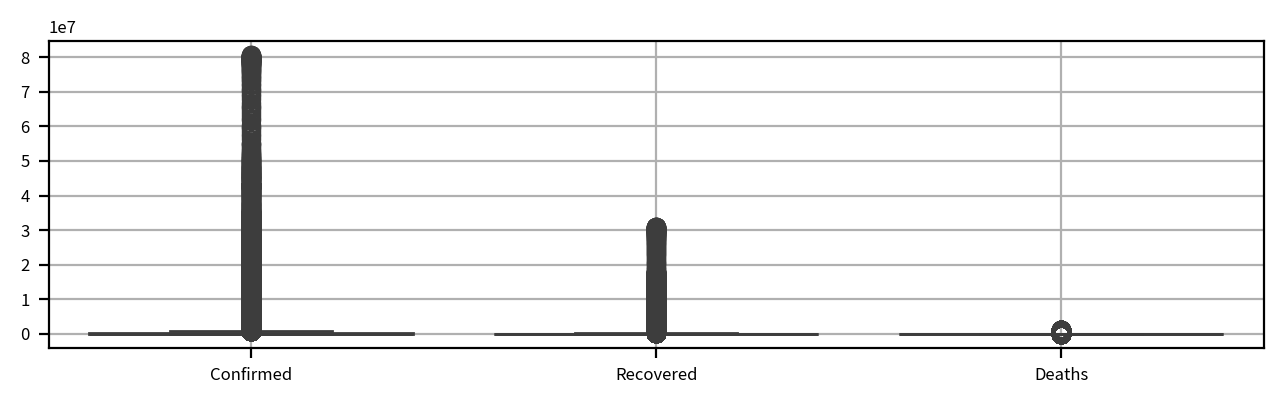

In [9]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df, orient = 'v')

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

**※ 인사이트:**
모든 변수간 격차 크고 우편향 심하고 이상치 많음
-> 이 상태론 데이터 분포 비교 어려움 -> 스케일링 필요함을 의미
> 데이터 간 격차가 클 경우, 데이터 스케일링 수행해야 한다.

> (-> log-scaling: 자릿수 격차가 심할 경우)

#### 2) 로그 스케일링을 통한 데이터 분포 재확인

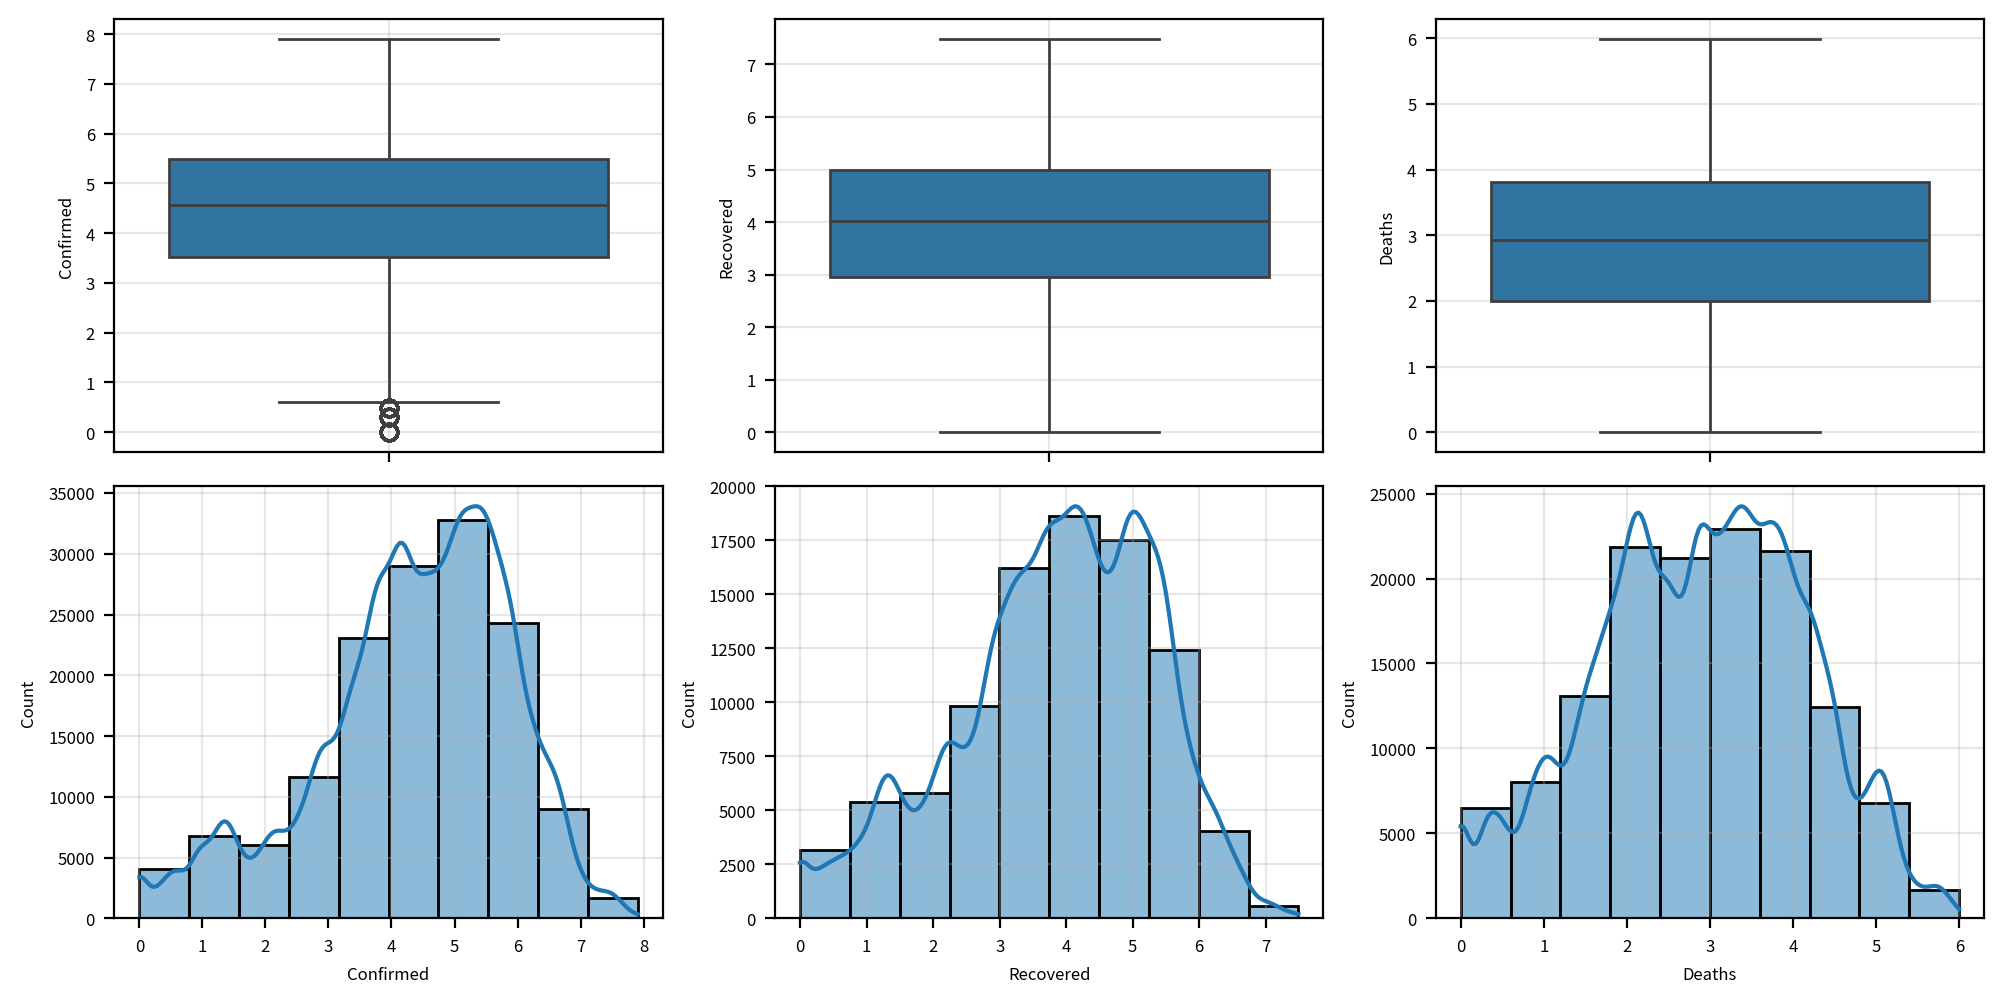

In [10]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 2000             # 그래프 가로 크기
height_px = 1000            # 그래프 세로 크기
rows = 2                    # 그래프 행 수 ≠ 1
cols = 3                    # 그래프 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for i, col in enumerate(['Confirmed', 'Recovered', 'Deaths']):
    data = df[df[col] > 0][col]
    log_data = np.log10(data)

    # 2) boxplot 그리기 + 꾸미기:
    sb.boxplot(log_data, ax = ax[0][i], orient = 'v')
    ax[0][i].grid(True, alpha=0.3)

    # 3) Histogram 그리기 + 꾸미기:
    sb.histplot(log_data, ax = ax[1][i], bins=10, kde=True)
    ax[1][i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

**※ 인사이트:**
시각화 결과로도 우편향 분포를 확인 가능했는데
이 중에서도 Confirmed, Recovered에서 우편향 분포가 더 명확함.

로그변환으로 스케일링을 해주면 데이터 분포가 정규분포화 되는 경향이 있는데
그럼에도 데이터 분포가 치우쳐져 있으면 애당초 정규분포가 아니였다는 뜻임

## #04. 범주형 변수 통계량

### 1. 빈도 및 최빈값 확인:
범주형 변수의 기술통계량 확인 코드:
`df.describe(include = 'category')`

In [11]:
df.describe(include = 'category')

,Country
count,161568
unique,198
top,Afghanistan
freq,816


## #05. 데이터 품질 종합 평가에 대한 결과 보고

- 데이터 완성도 (Completeness) 
  - 결측값 0개: 완벽한 데이터 완성도 달성 
  - 198개국 x 816일 = 161,568개 전체 레코드 누락 없음 
  - 시계열 연속성 보장으로 추세분석도 추후 가능
- 데이터 일관성 (Consistency) 
  - 모든 수치형 변수가 정수형(int64)로 타입이 일관됨 
  - 날짜 변수 표준 datetime64 형식 또한 일관성 유지함
- 데이터 분포 성격 (Distribution)
  - 극심한 우편향 분포: 소수 국가에 극값 집중 현상 
  - 높은 변동성: 표준편차가 평균의 4~6배 수준 
  - 국가 간 격차: 최댓값과 중위수 간 수천~수만배 차이
- (∴) 분석 시 고려해야 될 사항들 
  - 국가 간 격차가 매우 크므로 데이터를 구간 별로 나눠서 분석 시도 함이 바람직해보임 
  - 이상치 처리: 실제 데이터 기반이므로 이상치를 강제로 다른 값으로 바꾸기보다는 스케일링을 통한 해결이 바람직함